<a href="https://colab.research.google.com/github/Behzad-Iravani/PythonTools/blob/main/Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Survival** **Analysis**:

In this note book I assess the data from Maryland state prisons to determine the time to event (re-arrest) of the released convicts whom were follow up for a year after the release. The data is publicly alvalible as a part of lifelines package.  

In [2]:
# installing lifelines pacakage
! pip install lifelines


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 12.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=9f674dc9527572354e35aeb4cb6aafbc7a8fa5691a7d3e30a5d087681bb5600f
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load the dataset
from lifelines.datasets import load_rossi
df = load_rossi()

In [4]:
# investigating the dataset
df.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


week:
week of first arrest after release or censoring; all censored observations are censored at 52 weeks.

arrest:
1 if arrested, 0 if not arrested.

fin:
financial aid: no yes.

age:
in years at time of release.

race:
black or other.

wexp:
full-time work experience before incarceration: no or yes.

mar:
marital status at time of release: married or not married.

paro:
released on parole? no or yes.

prio:
number of convictions prior to current incarcerati

Column arrest determines if the convicted were arrested within 52 weeks of following up

In [9]:
print(f"total number of {df.arrest.sum()} of {len(df)} were re-arrested within the interval of following up (52 weeks); therefore the number of the censored data is {len(df)-df.arrest.sum()}.")

total number of 114 of 432 were re-arrested within the interval of following up (52 weeks); therefore the number of the censored data is 318.


There are 318 censored data here and I am going to use right censoring meaning that the number of weeks of re-arrest for censored data is more than 52 weeks but unknow for how many.

In [12]:
# check for missing data
df.isnull().sum()

week      0
arrest    0
fin       0
age       0
race      0
wexp      0
mar       0
paro      0
prio      0
dtype: int64

No missing data, therefore no imputation is neeeded.

Text(0, 0.5, 'counts')

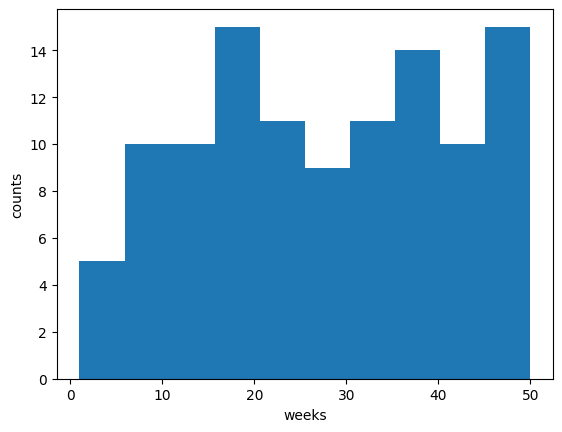

In [19]:
# plot the histogram of the weeks in data
plt.hist(df["week"][df["week"]<52].values) # removing censored data for visualization
plt.xlabel("weeks")
plt.ylabel("counts")

## Fitting a non-parametric model (Kaplan Maier curve)

In [20]:
# import packages
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

Text(0.5, 1.0, 'Survival Analysis')

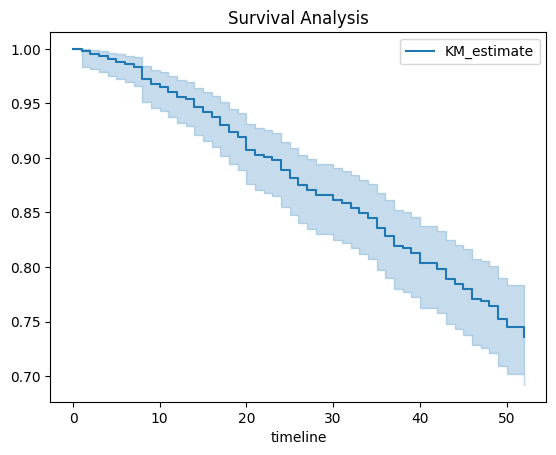

In [23]:
kmf = KaplanMeierFitter()
kmf.fit(durations = df["week"].values, event_observed = df["arrest"].values)
kmf.plot_survival_function()
plt.title("Survival Analysis")

<Axes: xlabel='timeline'>

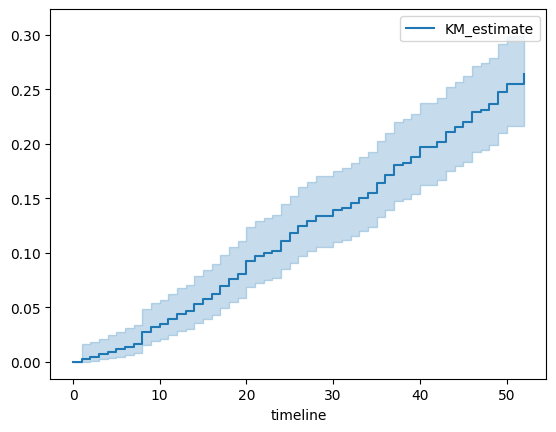

In [24]:
# cumultive plot
kmf.plot_cumulative_density()